In [1]:
import pandas as pd
import numpy as np
train_rdk7_scaffold = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Scaffold_train_featurized/RDK6.csv")
test_rdk7_scaffold = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Scaffold_test_featurized/RDK6.csv")
valid_rdk7_scaffold = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Scaffold_valid_featurized/RDK6.csv")

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
def tanimoto(vector1, vector2):
        a = np.where(vector1 == 1)[0]
        b = np.where(vector2 == 1)[0]
        tani = len(np.intersect1d(a, b)) / (float(len(a) + len(b)) - len(np.intersect1d(a, b)))
        return tani
def tanimoto_similarity_table(data):
    simi_list = []
    fingerprints = data.drop(["ID", "Scaffold", "Activity"], axis = 1).values
    size = len(fingerprints)
    hmap = np.empty(shape=(size, size))
    similarity_table = pd.DataFrame()
    for index, i in enumerate(fingerprints):
        for jindex, j in enumerate(fingerprints):
            simi = tanimoto(i, j)
            simi_list.append(simi)
            hmap[index, jindex] = simi
            similarity_table.loc[index, jindex] = simi
    return similarity_table


Training active scaffold (52, 2051)
Test active scaffold (24, 2051)


Text(0.5, 1.0, 'Training active and Test active scaffold RDK6')

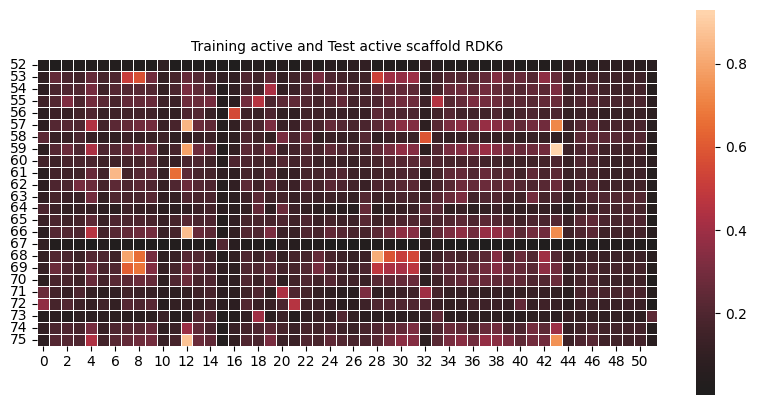

In [3]:
##Test_active_scaffold and train_active_scaffold
train_active_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==1]
test_active_scaffold = test_rdk7_scaffold[test_rdk7_scaffold["Activity"]==1]
data_1 = pd.concat([train_active_scaffold, test_active_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_active_scaffold.shape)
print("Test active scaffold", test_active_scaffold.shape)
similarity_table_1 = tanimoto_similarity_table(data_1).iloc[train_active_scaffold.shape[0]:,:train_active_scaffold.shape[0]]
#sns.set(font_scale=1)
plt.figure(figsize=(10, 10))
fig = sns.heatmap(similarity_table_1, annot = False, annot_kws={"fontsize":10}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .5})

plt.title('Training active and Test active scaffold RDK6', fontsize = 10)

Training active scaffold (228, 2051)
Test active scaffold (24, 2051)


/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

Text(0.5, 1.0, 'Training inactive and Test active scaffold RDk6')

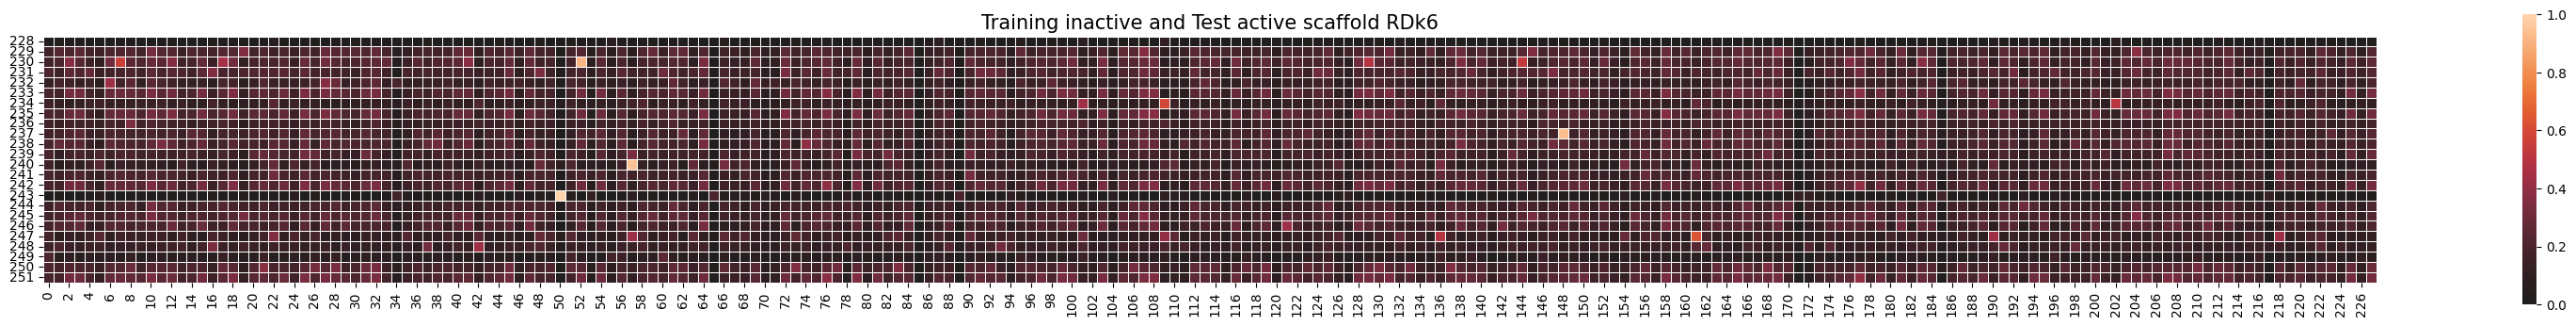

In [4]:
##Test_active_scaffold and train_inactive_scaffold
train_inactive_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==0]
test_active_scaffold = test_rdk7_scaffold[test_rdk7_scaffold["Activity"]==1]
data_2 = pd.concat([train_inactive_scaffold, test_active_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_inactive_scaffold.shape)
print("Test active scaffold", test_active_scaffold.shape)
similarity_table_2 = tanimoto_similarity_table(data_2).iloc[train_inactive_scaffold.shape[0]:,:train_inactive_scaffold.shape[0]]
plt.figure(figsize=(40, 40))
fig = sns.heatmap(similarity_table_2, annot = False, annot_kws={"fontsize":6}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .1})

plt.title('Training inactive and Test active scaffold RDk6', fontsize = 15)

Training active scaffold (52, 2051)
Test inactive scaffold (103, 2051)


/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

Text(0.5, 1.0, 'Training active and Test inactive scaffold RDK6')

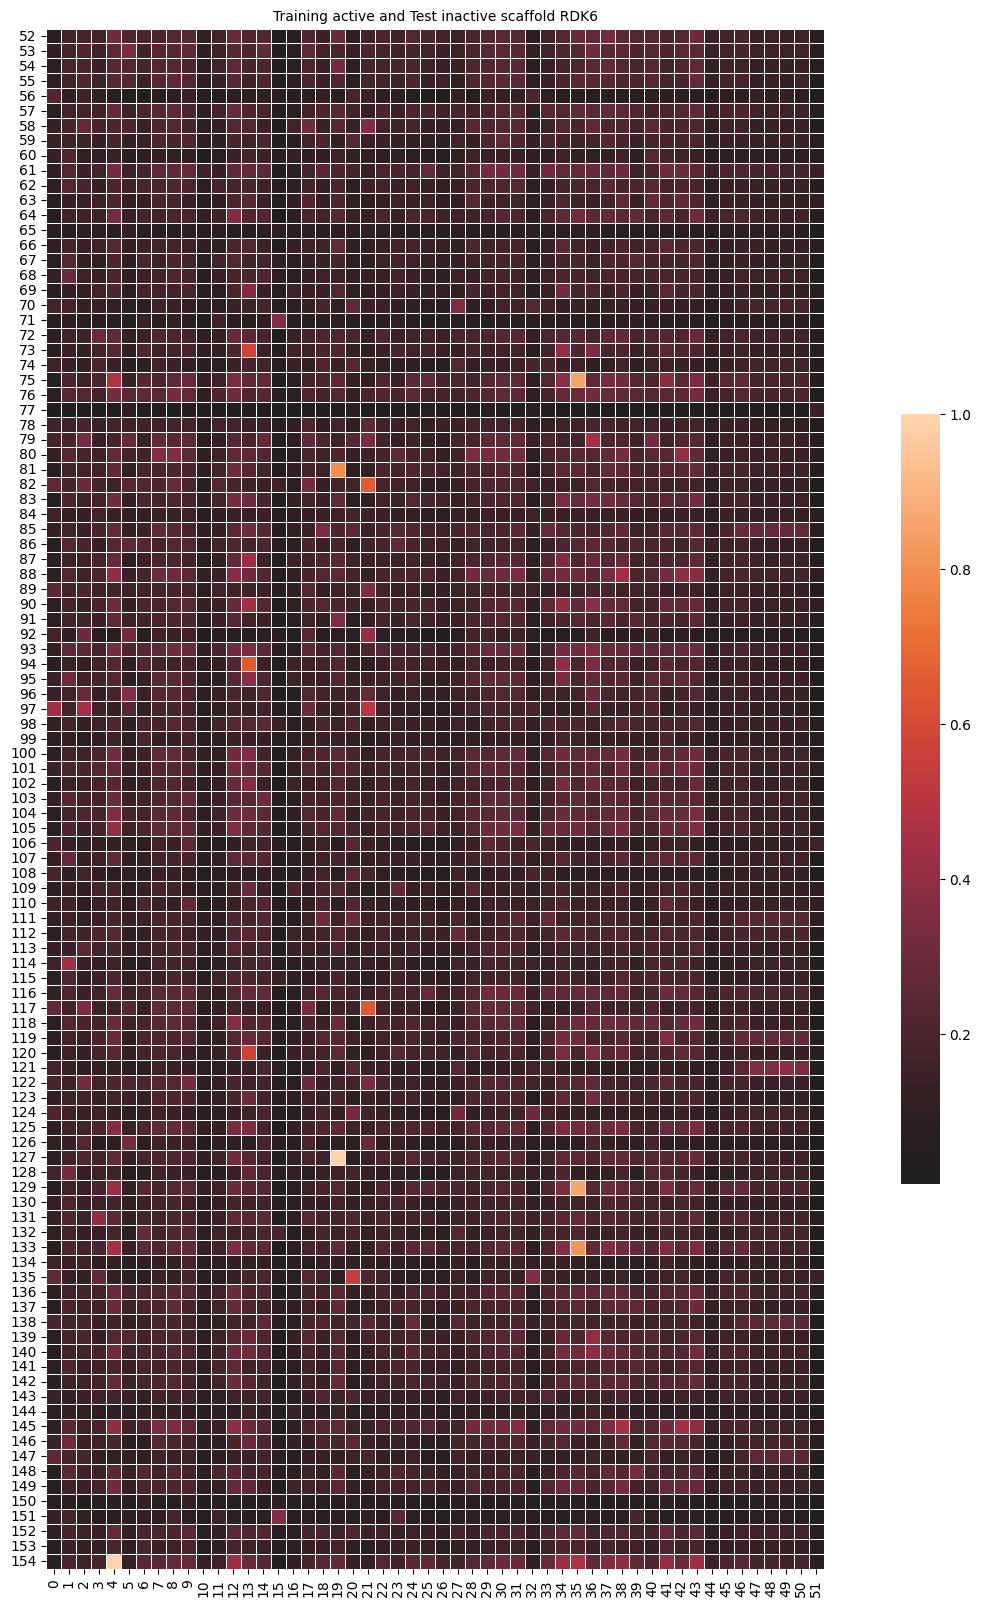

In [5]:
##Test_inactive_scaffold and train_active_scaffold
train_active_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==1]
test_inactive_scaffold = test_rdk7_scaffold[test_rdk7_scaffold["Activity"]==0]
data_3 = pd.concat([train_active_scaffold, test_inactive_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_active_scaffold.shape)
print("Test inactive scaffold", test_inactive_scaffold.shape)
similarity_table_3 = tanimoto_similarity_table(data_3).iloc[train_active_scaffold.shape[0]:,:train_active_scaffold.shape[0]]
plt.figure(figsize=(20, 20))
fig = sns.heatmap(similarity_table_3, annot = False, annot_kws={"fontsize":6}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .5})

plt.title('Training active and Test inactive scaffold RDK6', fontsize = 10)

Training active scaffold (228, 2051)
Test inactive scaffold (103, 2051)


/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

Text(0.5, 1.0, 'Training inactive and Test inactive scaffold RDK6')

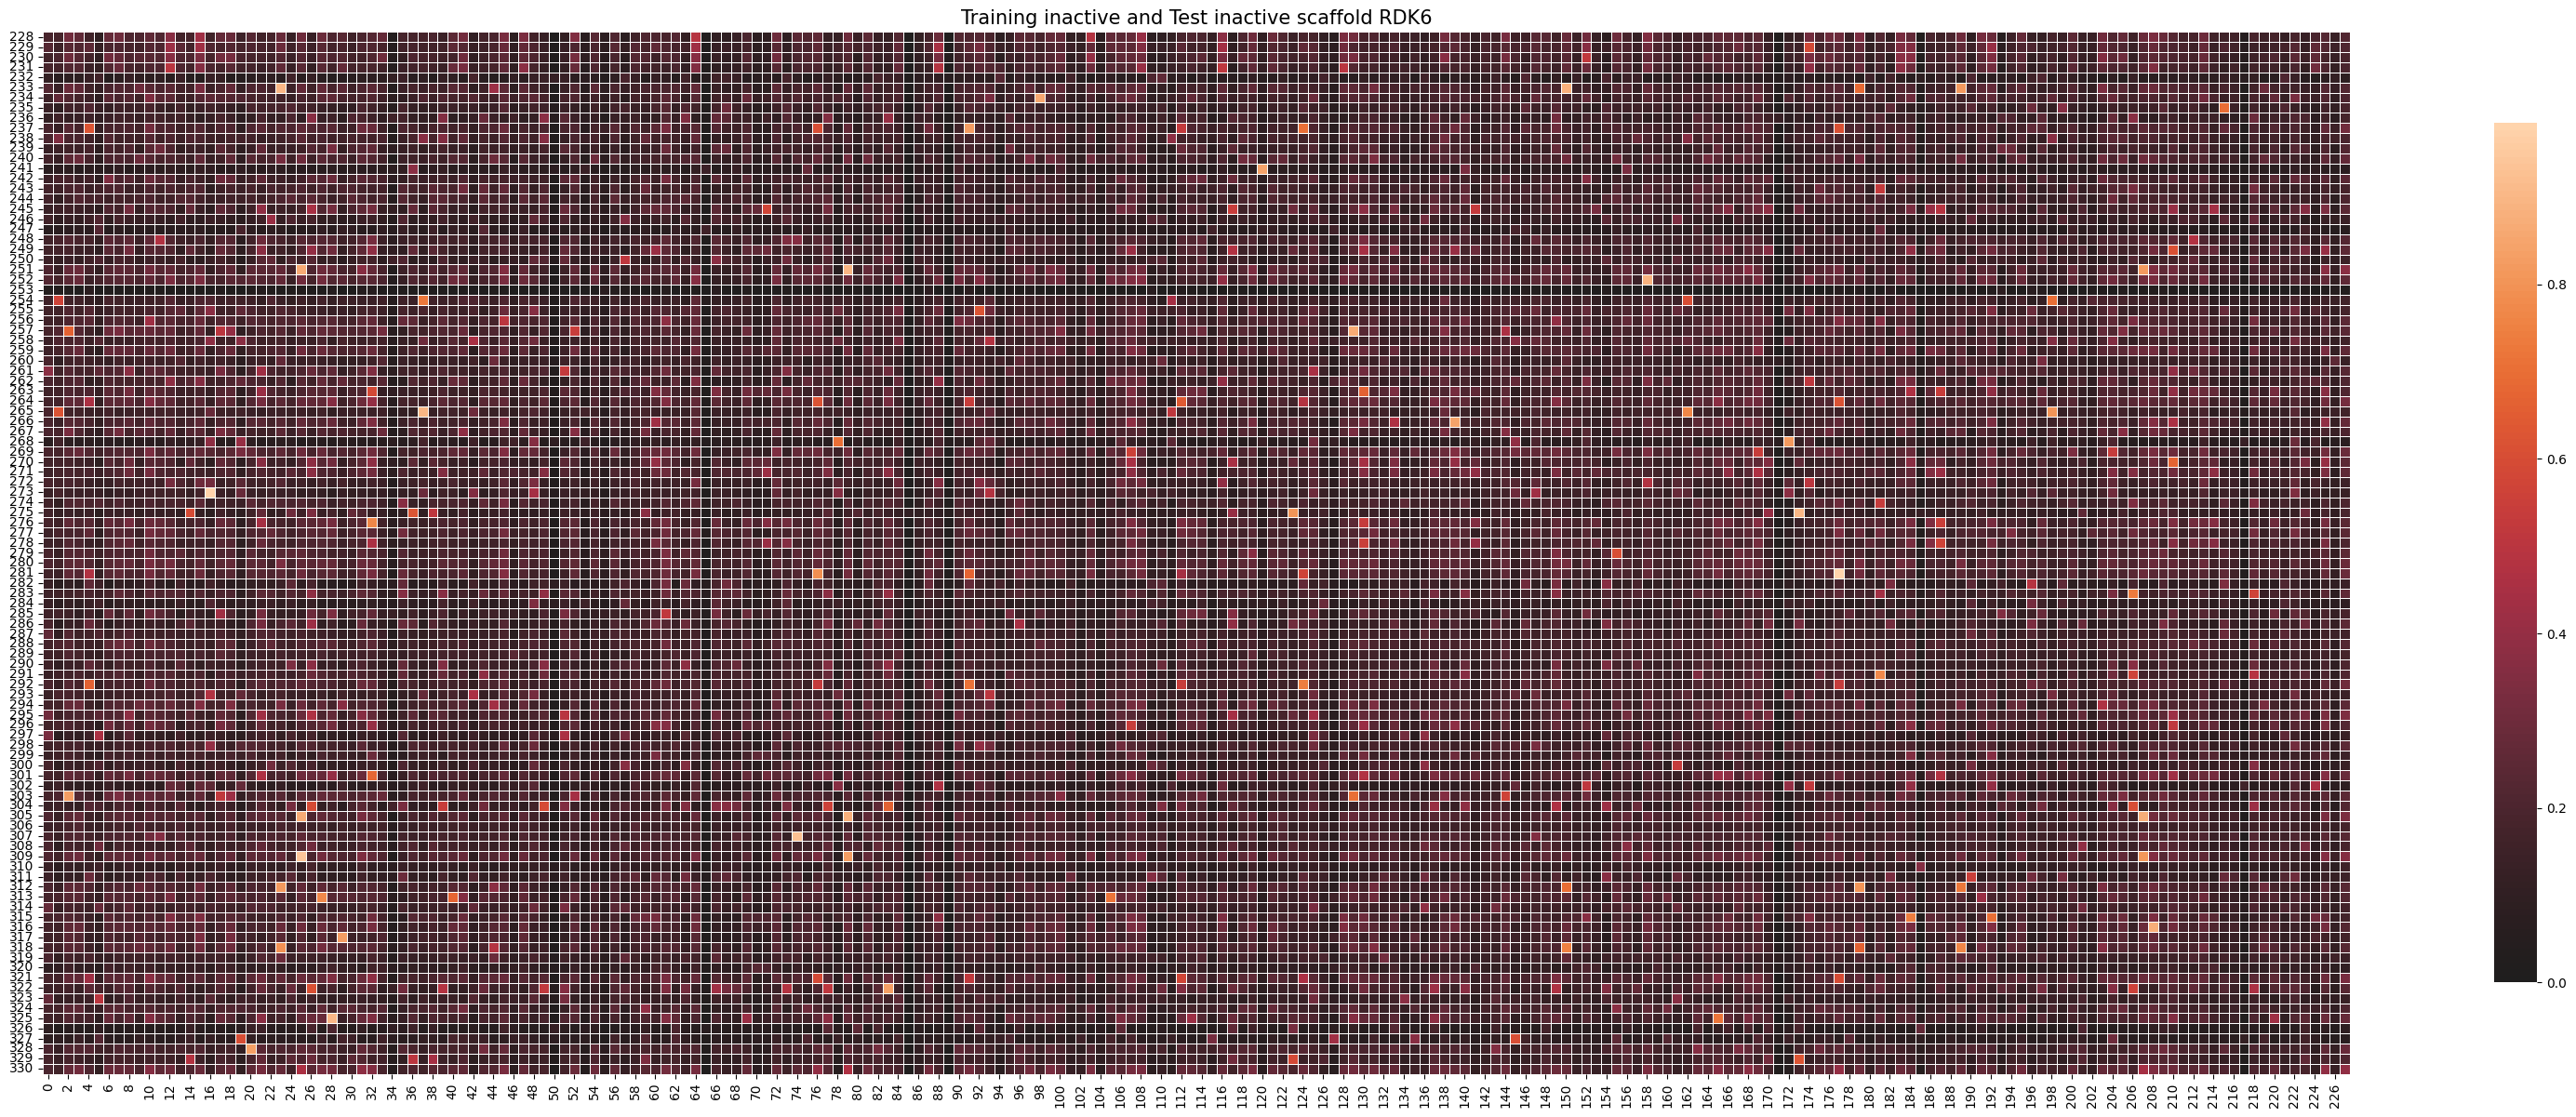

In [6]:
##Test_inactive_scaffold and train_inactive_scaffold
train_inactive_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==0]
test_inactive_scaffold = test_rdk7_scaffold[test_rdk7_scaffold["Activity"]==0]
data_4 = pd.concat([train_inactive_scaffold, test_inactive_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_inactive_scaffold.shape)
print("Test inactive scaffold", test_inactive_scaffold.shape)
similarity_table_4 = tanimoto_similarity_table(data_4).iloc[train_inactive_scaffold.shape[0]:,:train_inactive_scaffold.shape[0]]
plt.figure(figsize=(40, 40))
fig = sns.heatmap(similarity_table_4, annot = False, annot_kws={"fontsize":6}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .3})
plt.title('Training inactive and Test inactive scaffold RDK6', fontsize = 15)

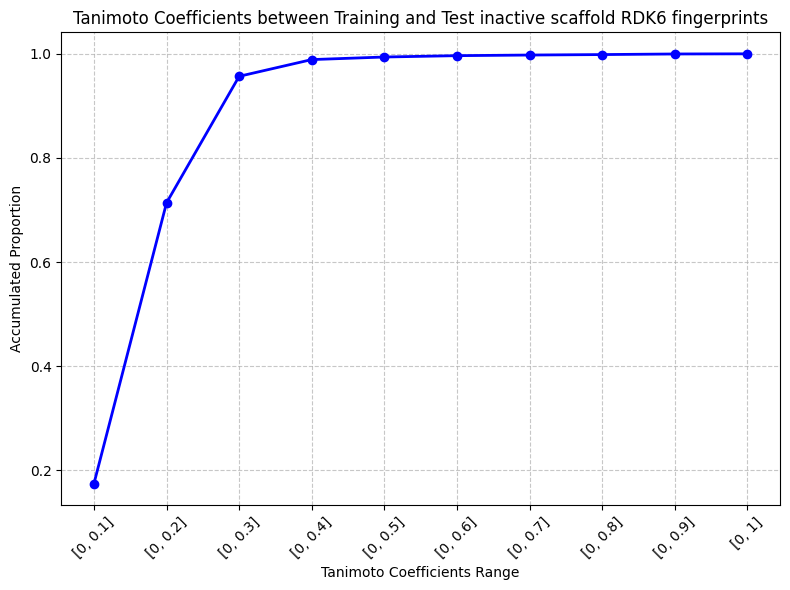

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random Tanimoto coefficients for demonstration
np.random.seed(42)  # For reproducibility
tanimoto_coefficients =  similarity_table_4.values.flatten()
# Define the bins
bins = np.linspace(0, 1, num=11)

# Count the number of coefficients in each bin
hist, _ = np.histogram(tanimoto_coefficients, bins=bins)

# Calculate the accumulated proportion
accumulated_proportion = np.cumsum(hist) / np.sum(hist)

# Plot the accumulated proportion
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.plot(bins[:-1], accumulated_proportion, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.xlabel('Tanimoto Coefficients Range')
plt.ylabel('Accumulated Proportion')
plt.title('Tanimoto Coefficients between Training and Test inactive scaffold RDK6 fingerprints')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid

# Label the bins on x-axis
bin_labels = [f'[0, {bin_end:.1f}]' for bin_end in bins[1:]]
bin_labels[0] = '[0, 0.1]'  # Change the first label
bin_labels[-1] = '[0, 1]'  # Change the last label
plt.xticks(bins[:-1], bin_labels, rotation=45)

plt.tight_layout()  # Improve spacing
plt.show()


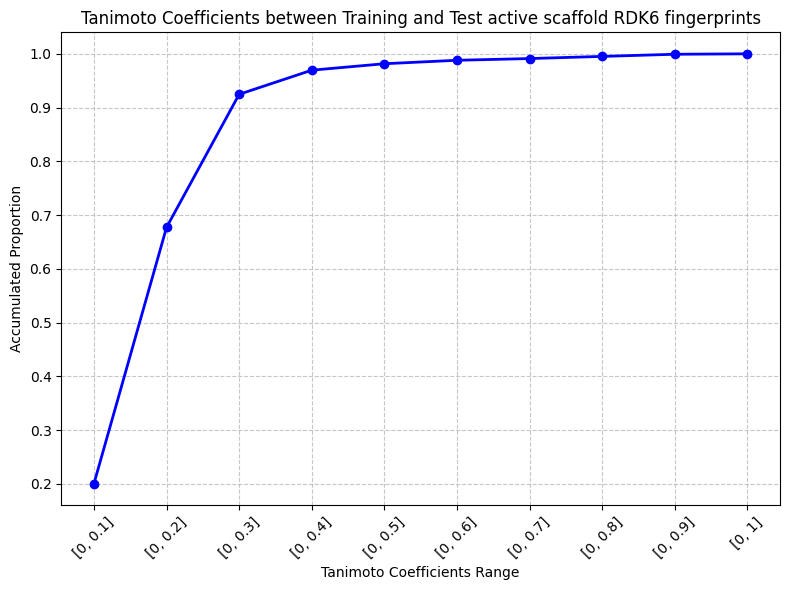

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random Tanimoto coefficients for demonstration
np.random.seed(42)  # For reproducibility
tanimoto_coefficients =  similarity_table_1.values.flatten()
# Define the bins
bins = np.linspace(0, 1, num=11)

# Count the number of coefficients in each bin
hist, _ = np.histogram(tanimoto_coefficients, bins=bins)

# Calculate the accumulated proportion
accumulated_proportion = np.cumsum(hist) / np.sum(hist)

# Plot the accumulated proportion
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.plot(bins[:-1], accumulated_proportion, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.xlabel('Tanimoto Coefficients Range')
plt.ylabel('Accumulated Proportion')
plt.title('Tanimoto Coefficients between Training and Test active scaffold RDK6 fingerprints')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid

# Label the bins on x-axis
bin_labels = [f'[0, {bin_end:.1f}]' for bin_end in bins[1:]]
bin_labels[0] = '[0, 0.1]'  # Change the first label
bin_labels[-1] = '[0, 1]'  # Change the last label
plt.xticks(bins[:-1], bin_labels, rotation=45)

plt.tight_layout()  # Improve spacing
plt.show()


Training active scaffold (52, 2051)
Valid active scaffold (10, 2051)


Text(0.5, 1.0, 'Training active and Valid active scaffold RDK6')

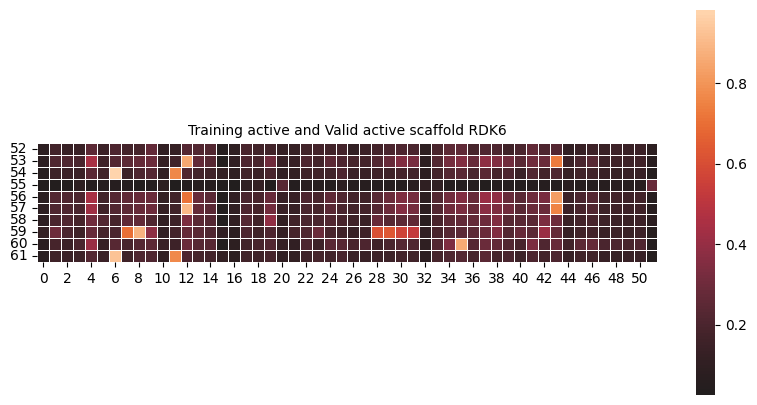

In [9]:
##Test_active_scaffold and train_active_scaffold
train_active_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==1]
valid_active_scaffold = valid_rdk7_scaffold[valid_rdk7_scaffold["Activity"]==1]
data_1 = pd.concat([train_active_scaffold, valid_active_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_active_scaffold.shape)
print("Valid active scaffold", valid_active_scaffold.shape)
similarity_table_1_1 = tanimoto_similarity_table(data_1).iloc[train_active_scaffold.shape[0]:,:train_active_scaffold.shape[0]]
#sns.set(font_scale=1)
plt.figure(figsize=(10, 10))
fig = sns.heatmap(similarity_table_1_1, annot = False, annot_kws={"fontsize":10}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .5})

plt.title('Training active and Valid active scaffold RDK6', fontsize = 10)

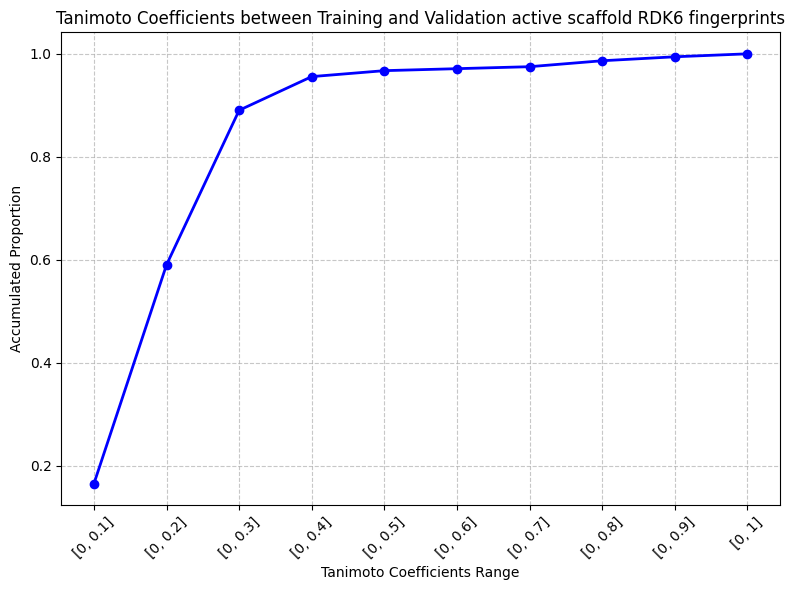

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random Tanimoto coefficients for demonstration
np.random.seed(42)  # For reproducibility
tanimoto_coefficients =  similarity_table_1_1.values.flatten()
# Define the bins
bins = np.linspace(0, 1, num=11)

# Count the number of coefficients in each bin
hist, _ = np.histogram(tanimoto_coefficients, bins=bins)

# Calculate the accumulated proportion
accumulated_proportion = np.cumsum(hist) / np.sum(hist)

# Plot the accumulated proportion
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.plot(bins[:-1], accumulated_proportion, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.xlabel('Tanimoto Coefficients Range')
plt.ylabel('Accumulated Proportion')
plt.title('Tanimoto Coefficients between Training and Validation active scaffold RDK6 fingerprints')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid

# Label the bins on x-axis
bin_labels = [f'[0, {bin_end:.1f}]' for bin_end in bins[1:]]
bin_labels[0] = '[0, 0.1]'  # Change the first label
bin_labels[-1] = '[0, 1]'  # Change the last label
plt.xticks(bins[:-1], bin_labels, rotation=45)

plt.tight_layout()  # Improve spacing
plt.show()


Training active scaffold (228, 2051)
Valid inactive scaffold (63, 2051)


/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  similarity_table.loc[index, jindex] = simi
/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_3486/249273597.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

Text(0.5, 1.0, 'Training inactive and Valid inactive scaffold RDK6')

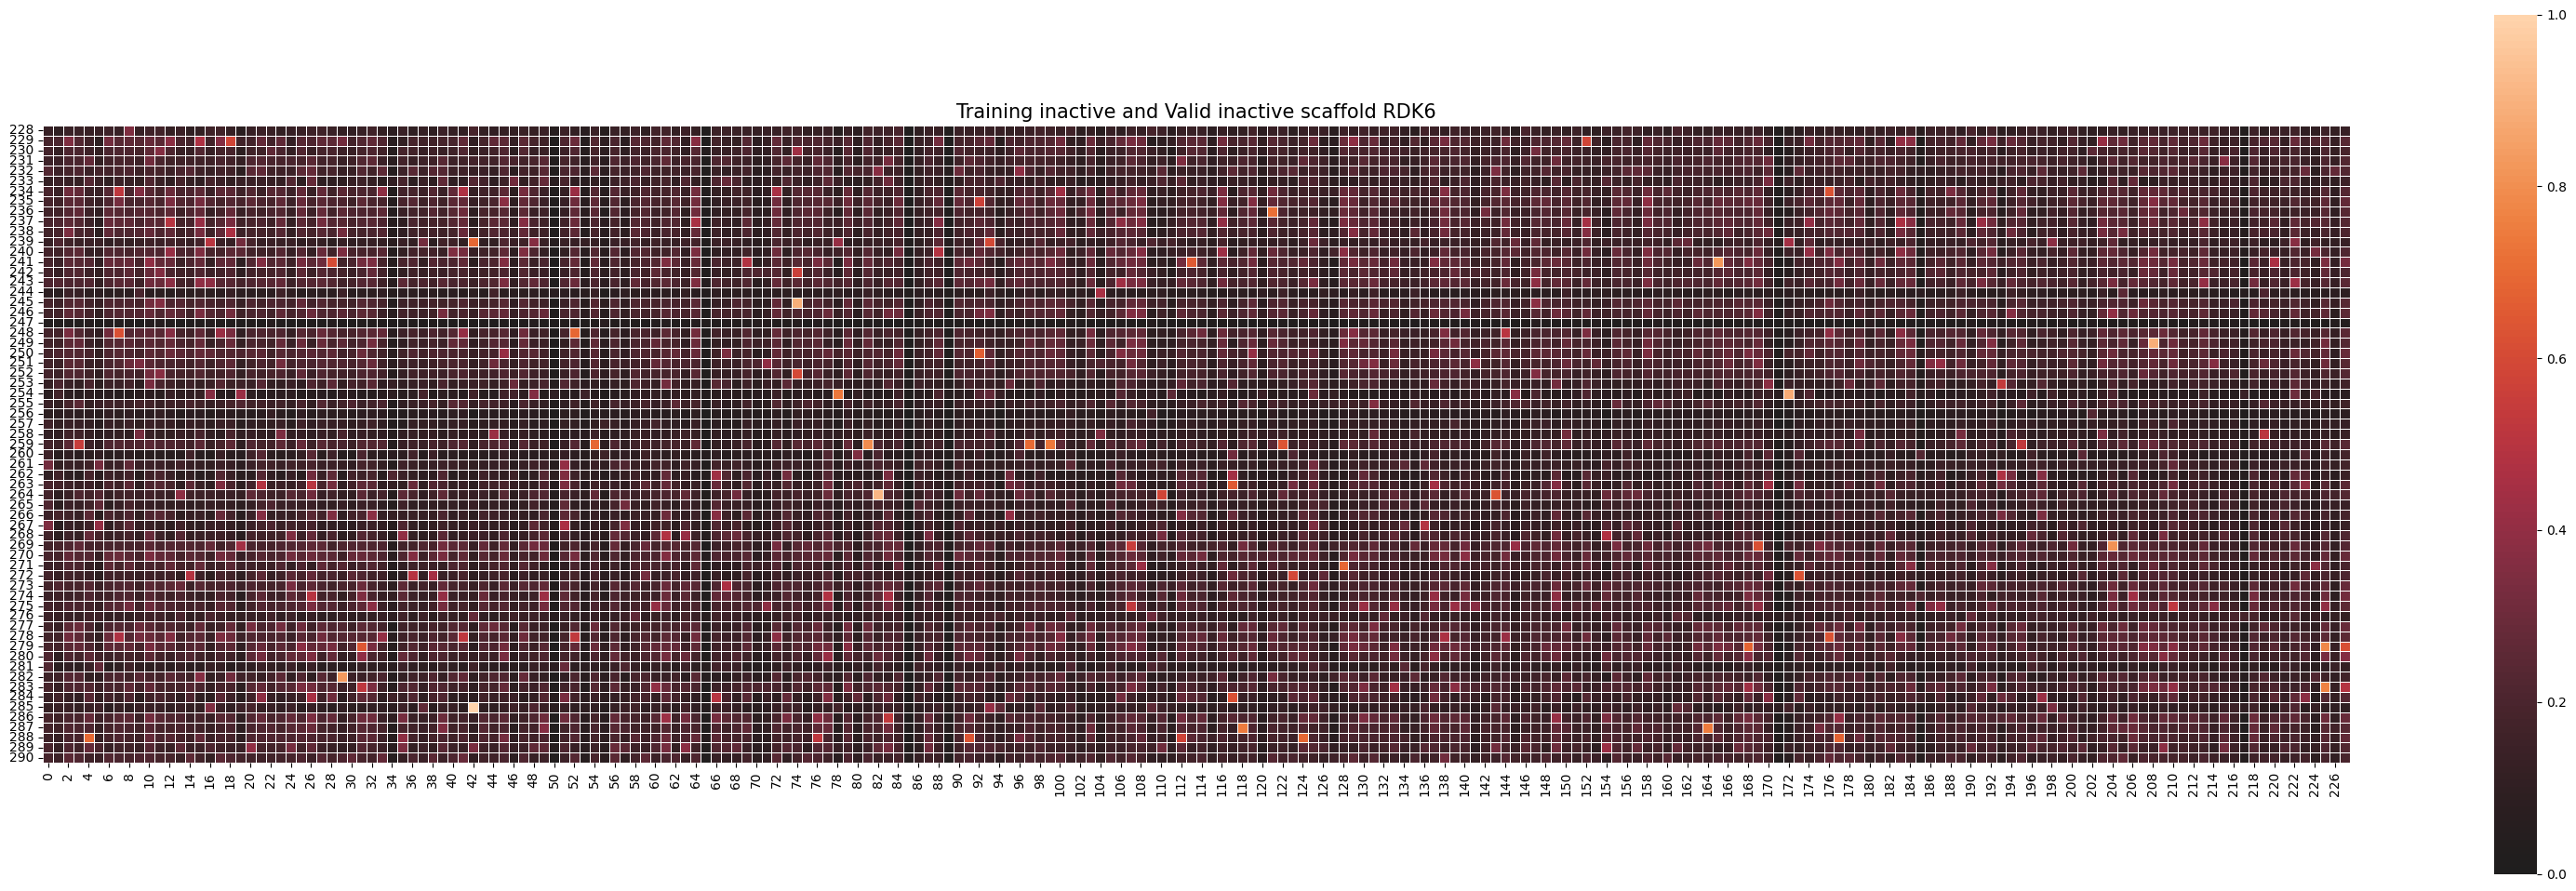

In [11]:
##Valid_inactive_scaffold and train_inactive_scaffold
train_inactive_scaffold = train_rdk7_scaffold[train_rdk7_scaffold["Activity"]==0]
valid_inactive_scaffold = valid_rdk7_scaffold[valid_rdk7_scaffold["Activity"]==0]
data_4 = pd.concat([train_inactive_scaffold, valid_inactive_scaffold], axis = 0).reset_index(drop=True)
print("Training active scaffold", train_inactive_scaffold.shape)
print("Valid inactive scaffold", valid_inactive_scaffold.shape)
similarity_table_4_1 = tanimoto_similarity_table(data_4).iloc[train_inactive_scaffold.shape[0]:,:train_inactive_scaffold.shape[0]]
plt.figure(figsize=(40, 40))
fig = sns.heatmap(similarity_table_4_1, annot = False, annot_kws={"fontsize":6}, center=0,
                square=True,  linewidths=0.5, cbar_kws={"shrink": .3})
plt.title('Training inactive and Valid inactive scaffold RDK6', fontsize = 15)

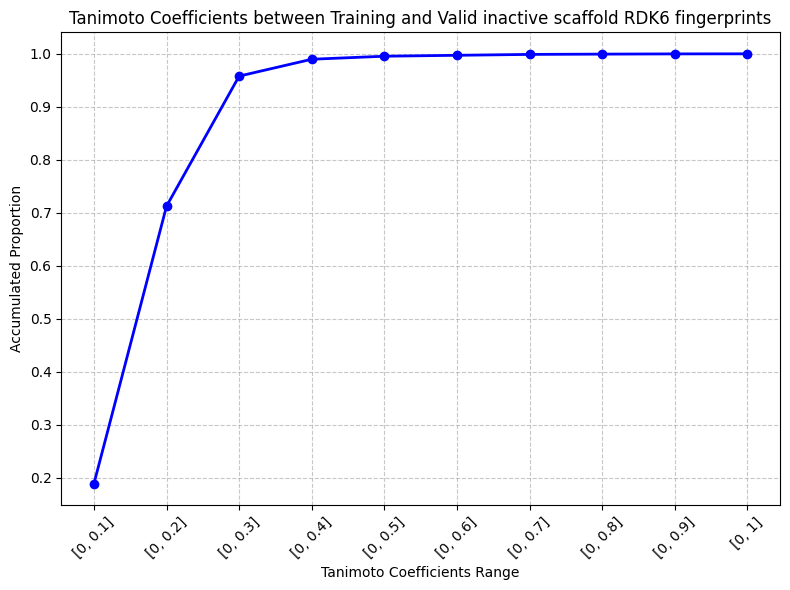

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random Tanimoto coefficients for demonstration
np.random.seed(42)  # For reproducibility
tanimoto_coefficients =  similarity_table_4_1.values.flatten()
# Define the bins
bins = np.linspace(0, 1, num=11)

# Count the number of coefficients in each bin
hist, _ = np.histogram(tanimoto_coefficients, bins=bins)

# Calculate the accumulated proportion
accumulated_proportion = np.cumsum(hist) / np.sum(hist)

# Plot the accumulated proportion
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.plot(bins[:-1], accumulated_proportion, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.xlabel('Tanimoto Coefficients Range')
plt.ylabel('Accumulated Proportion')
plt.title('Tanimoto Coefficients between Training and Valid inactive scaffold RDK6 fingerprints')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid

# Label the bins on x-axis
bin_labels = [f'[0, {bin_end:.1f}]' for bin_end in bins[1:]]
bin_labels[0] = '[0, 0.1]'  # Change the first label
bin_labels[-1] = '[0, 1]'  # Change the last label
plt.xticks(bins[:-1], bin_labels, rotation=45)

plt.tight_layout()  # Improve spacing
plt.show()
